This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [24]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2021-12-01 23:27:27--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-12-01 23:27:28--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccaabc3d54f8d2a1b4da8051c9f.dl.dropboxusercontent.com/cd/0/inline/BbBffWIJhPloaBkrNskERoDvGcefeOOwdYbuUBo9vfDEcnuB9l4S3nsWjCKVHZxlDC2IhFuVm_vziukssKEW2IMIsKTcsl0hYcVWmlAseb1gZ0dXIC9XfaLEzzwbodJU7b-Gq8oj1OJo8dqRH9Ix-3uC/file# [following]
--2021-12-01 23:27:28--  https://uccaabc3d54f8d2a1b4da8051c9f.dl.dropboxusercontent.com/cd/0/inline/BbBffWIJhPloaBkrNskERoDvGcefeOOwdYbuUBo9vfDEcnuB9l4S3nsWjCKVHZxlDC2IhFuVm_vziukssKEW2IMIsKTcsl0hYcVWmlAseb1

  8800K .......... .......... .......... .......... .......... 27% 49,7M 3s
  8850K .......... .......... .......... .......... .......... 27%  345M 2s
  8900K .......... .......... .......... .......... .......... 27%  527M 2s
  8950K .......... .......... .......... .......... .......... 27% 53,2M 2s
  9000K .......... .......... .......... .......... .......... 27%  309M 2s
  9050K .......... .......... .......... .......... .......... 28% 47,4M 2s
  9100K .......... .......... .......... .......... .......... 28%  496M 2s
  9150K .......... .......... .......... .......... .......... 28%  309M 2s
  9200K .......... .......... .......... .......... .......... 28% 29,0M 2s
  9250K .......... .......... .......... .......... .......... 28%  564M 2s
  9300K .......... .......... .......... .......... .......... 28% 56,7M 2s
  9350K .......... .......... .......... .......... .......... 29%  174M 2s
  9400K .......... .......... .......... .......... .......... 29% 48,8M 2s
  9450K ....

In [26]:
import pandas as pd
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [30]:
import random
N = random.randint(10000,1310720)
print("N the random choosen")
print(N)
df = pd.read_csv(file_name, nrows=N)
df

N the random choosen
1241458


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1241453,1,0,35,3869210709,3254,10
1241454,1,1,1,3869210709,3441,12
1241455,1,1,2,3869210709,3437,19
1241456,1,0,49,3869210709,3442,26


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [31]:
bx_mx = data['BX_COUNTER'].max()
print(bx_mx)

3563


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [40]:
orbit_value = data['ORBIT_CNT'].iloc[len(data.index)-1] - data['ORBIT_CNT'].iloc[0]
bx_value = data['BX_COUNTER'].iloc[len(data.index)-1] - data['BX_COUNTER'].iloc[0]
tdc_value = data['TDC_MEAS'].iloc[len(data.index)-1] - data['TDC_MEAS'].iloc[0]

time_sec = orbit_value*bx_max*25e-9 + bx_value*25e-9 + tdc_value*25e-9/30
time_minutes = time_sec/60
time_hours = time_minutes/60
print("time estimated in second",time_sec)
print("time estimated in minutes",time_minutes)
print("time estimated in hours",time_hours)

time estimated in second 0.9801409933333333
time estimated in minutes 0.01633568322222222
time estimated in hours 0.000272261387037037


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [47]:
##nanosec ex
df['nanosectime'] = df['ORBIT_CNT']*bx_mx*25+df['BX_COUNTER']*25+df['TDC_MEAS']*25/30
print("new col with nanosec ")
df

new col with nanosec 


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time,nanosectime
0,1,0,123,3869200167,2374,26,3.446490e+14,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14,3.446490e+14
...,...,...,...,...,...,...,...,...
1241453,1,0,35,3869210709,3254,10,3.446499e+14,3.446499e+14
1241454,1,1,1,3869210709,3441,12,3.446499e+14,3.446499e+14
1241455,1,1,2,3869210709,3437,19,3.446499e+14,3.446499e+14
1241456,1,0,49,3869210709,3442,26,3.446499e+14,3.446499e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [52]:
noisyTDC=df.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)
print("the noisy channels")
##printing the top 3
print(noisyTDC[0:3])

the noisy channels
TDC_CHANNEL
139    102401
64      62502
63      61188
dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [56]:
non_empty_orbits = len(df.groupby('ORBIT_CNT').count())
print("how many nonempty orbits")
print(non_empty_orbits)
##number of unique orbitds at least one measurement in TDC_CHANNEL=139
non_empty139=df[df['TDC_CHANNEL']==139].groupby('ORBIT_CNT').count()
print("number of unique orbits in TDC_CHANNEL=139 at least one mes")
print(len(non_empty139))

how many nonempty orbits
10539
number of unique orbits in TDC_CHANNEL=139 at least one mes
10514


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

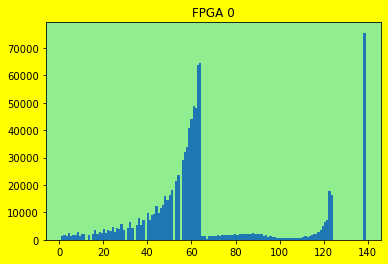

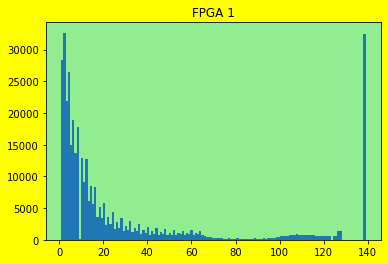

In [76]:
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.facecolor':'lightgreen'})
plt.figure(facecolor='yellow') 
FPGA_0 = data[data['FPGA'] == 0]["TDC_CHANNEL"]
FPGA_1 = data[data['FPGA'] == 1]["TDC_CHANNEL"]
channel_0 = data[data['FPGA'] == 0]["TDC_CHANNEL"].max()
channel_1 = data[data['FPGA'] == 1]["TDC_CHANNEL"].max()

plt.hist(FPGA_0,bins=channel_0)
plt.title('FPGA 0')
plt.show()
plt.figure(facecolor='yellow') 
plt.hist(FPGA_1,bins=channel_1)
plt.title('FPGA 1')
plt.show()